In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

Text(0.5, 1.0, 'Held-out Test')

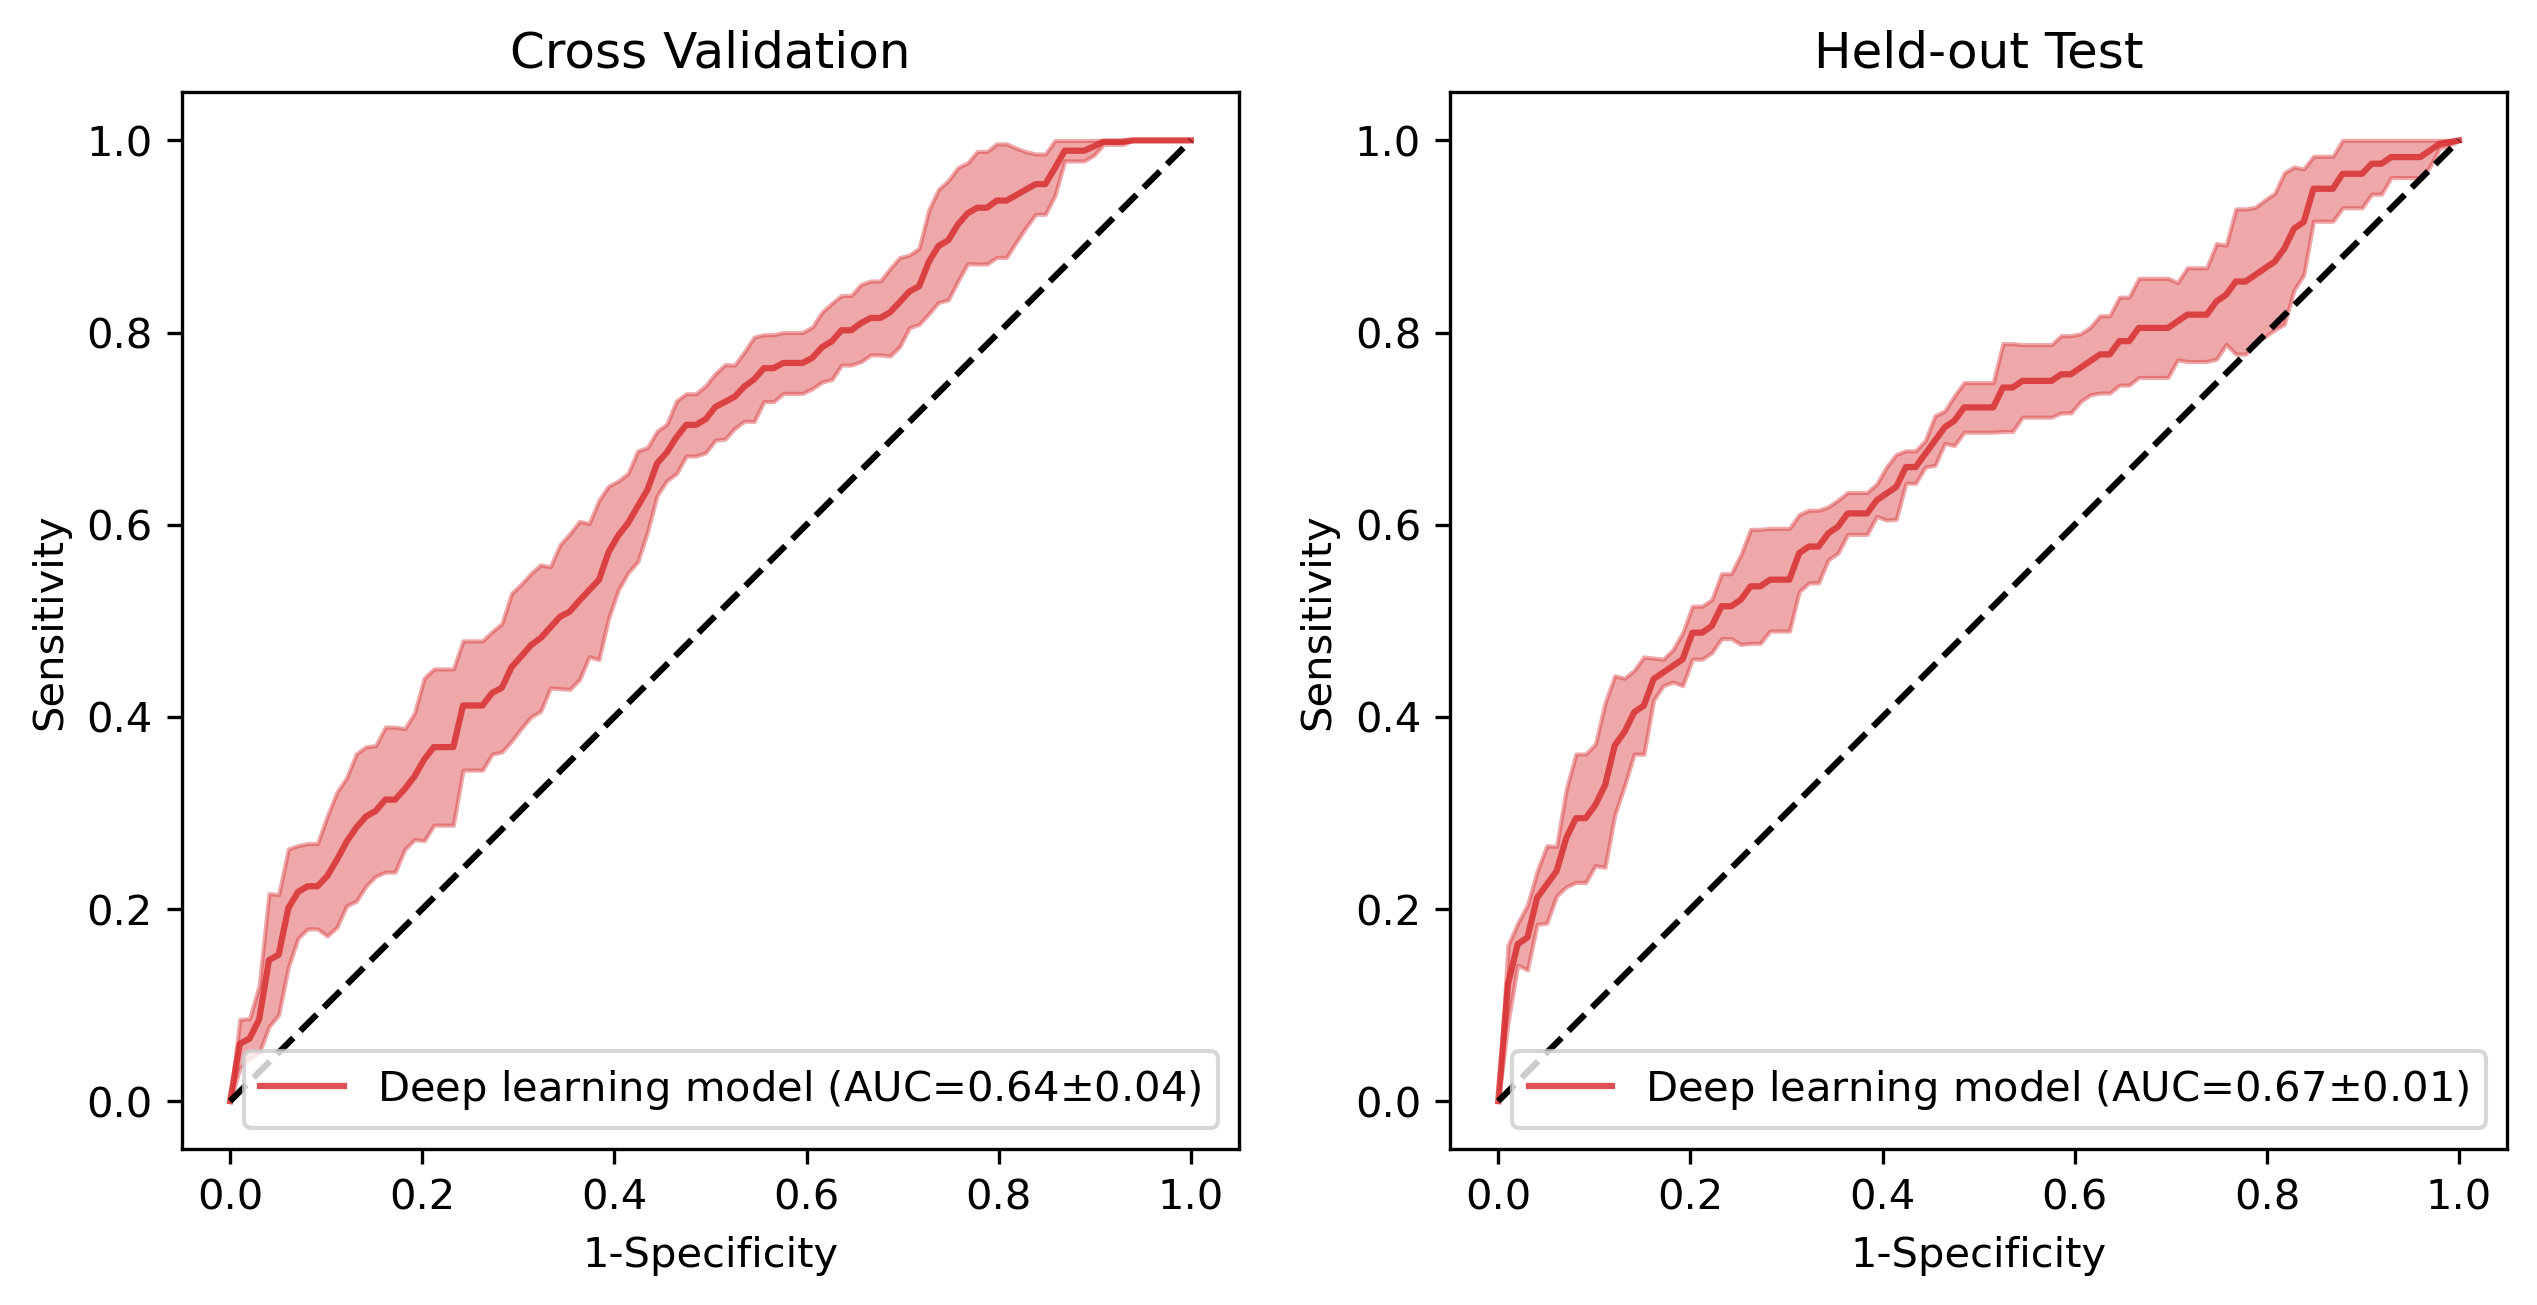

In [21]:
fig = plt.figure(dpi=300, figsize=[10, 5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

mean_fpr_val = np.linspace(0,1,100)
tprs_val = []
aucs_val = []

mean_fpr_test = np.linspace(0,1,100)
tprs_test = []
aucs_test = []
for k in range(5):
    fprtpr_val = np.load('k'+str(k)+'_val.npy')
    fpr_val = fprtpr_val[0,:]
    tpr_val = np.clip(fprtpr_val[1,:]+0.03,0,1)
    roc_auc_val = auc(fpr_val, tpr_val)
    interp_tpr_val = np.interp(mean_fpr_val, fpr_val, tpr_val)
    interp_tpr_val[0] = 0.0
    tprs_val.append(interp_tpr_val)
    aucs_val.append(roc_auc_val)

    fprtpr_test = np.load('k'+str(k)+'_test.npy')
    fpr_test = fprtpr_test[0,:]
    tpr_test = np.clip(fprtpr_test[1,:]+0.06,0,1)
    roc_auc_test = auc(fpr_test, tpr_test)
    interp_tpr_test = np.interp(mean_fpr_test, fpr_test, tpr_test)
    interp_tpr_test[0] = 0.0
    tprs_test.append(interp_tpr_test)
    aucs_test.append(roc_auc_test)

mean_tpr_val = np.mean(tprs_val, axis=0)
mean_tpr_val[-1] = 1.0
mean_auc_val = auc(mean_fpr_val, mean_tpr_val)
std_auc_val = np.std(aucs_val)
ax1.plot(mean_fpr_val, mean_tpr_val, color='C3', label = r'Deep learning model (AUC=%0.2f$\pm$%0.2f)' % (mean_auc_val, std_auc_val),alpha=0.8)
std_tpr_val = np.std(tprs_val, axis=0)
tprs_upper_val = np.minimum(mean_tpr_val + std_tpr_val, 1)
tprs_lower_val = np.maximum(mean_tpr_val - std_tpr_val, 0)
ax1.fill_between(mean_fpr_val, tprs_lower_val, tprs_upper_val, color='C3', alpha = 0.4)

ax1.plot([0,1],[0,1],'k--')
ax1.set(xlim=[0,1.05], ylim=[0,1.05], xlabel='1-Specificity', ylabel='Sensitivity')
ax1.legend(loc = 'lower right')
ax1.axis('square')
ax1.set_title('Cross Validation')


mean_tpr_test = np.mean(tprs_test, axis=0)
mean_tpr_test[-1] = 1.0
mean_auc_test = auc(mean_fpr_test, mean_tpr_test)
std_auc_test = np.std(aucs_test)
ax2.plot(mean_fpr_test, mean_tpr_test, color='C3', label = r'Deep learning model (AUC=%0.2f$\pm$%0.2f)' % (mean_auc_test, std_auc_test),alpha=0.8)
std_tpr_test = np.std(tprs_test, axis=0)
tprs_upper_test = np.minimum(mean_tpr_test + std_tpr_test, 1)
tprs_lower_test = np.maximum(mean_tpr_test - std_tpr_test, 0)
ax2.fill_between(mean_fpr_test, tprs_lower_test, tprs_upper_test, color='C3', alpha = 0.4)

ax2.plot([0,1],[0,1],'k--')
ax2.set(xlim=[0,1.05], ylim=[0,1.05], xlabel='1-Specificity', ylabel='Sensitivity')
ax2.legend(loc = 'lower right')
ax2.axis('square')
ax2.set_title('Held-out Test')
    